# Import Liebrary

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind

# Import File

In [4]:
df = pd.read_excel("housing.xlsx")

In [5]:
df.shape

(4600, 18)

In [144]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year,month,day,state_name
0,2014-05-03,310000.0,3,1.0,1010.0,9945.0,1,No,No View,Great,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,2014,5,3,Washington
1,2014-05-04,775000.0,2,2.5,2680.0,7392.0,1,No,No View,Good,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,2014,5,4,Washington
2,2014-05-04,365000.0,3,2.5,2200.0,7350.0,1,No,No View,Excellent,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,2014,5,4,Washington
3,2014-05-04,331950.0,4,2.5,2530.0,9933.0,2,No,Good View,Good,...,1990,2009,925 48th Ct,Auburn,WA 98092,USA,2014,5,4,Washington
4,2014-05-04,783500.0,3,2.5,2850.0,7130.0,2,No,No View,Good,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,2014,5,4,Washington


In [8]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536


# INTRODUCTION

## Objective

#### The goal of this project is to analyze housing data to understand what factors influence house prices, identify patterns and trends
#### and provide actionable insights for buyers, sellers, and investors

## Dataset Summary

#### Location: City, State ZIP Code
#### Property Characteristics: Bedrooms, Bathrooms, Square Footage, Floors
#### Quality & Condition: House Condition, Grade, Renovation Year
#### Special Features: View, Waterfront
#### Financial Info: Price, Date of Sale

## Process

#### Clean and Prepare the Data
#### Explore the Data (EDA)
#### Feature Engineering
#### Visualization
#### Final Recommendations & Insights

# Data Cleaning

In [100]:
 df.isnull().sum()


date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [101]:
df.dropna(inplace=True)

In [102]:
df.shape

(4510, 18)

# Null Values Removed

In [103]:
 df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                float64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [106]:

print(df['bedrooms'].value_counts())
print(df['bathrooms'].value_counts())

bedrooms
3    1986
4    1503
2     555
5     348
6      61
1      38
7      14
8       2
0       2
9       1
Name: count, dtype: int64
bathrooms
2.50    1158
1.00     729
1.75     615
2.00     418
2.25     411
1.50     285
2.75     273
3.00     165
3.50     162
3.25     133
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64


# Remove Invalid Rows

In [107]:


invalid_rows = df[(df['bedrooms'] <= 0) | (df['bathrooms'] <= 0) | (df['yr_built'] >= pd.Timestamp.now().year)|
(df['price'] <= 0)]

In [108]:
df = df.drop(invalid_rows.index)

In [109]:
df.shape

(4460, 18)

# Data type Changed

In [110]:
df['floors'] = df['floors'].round().astype(int) 
df['yr_built'] = df['yr_built'].astype(int)


In [111]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int32
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

# 
Convert to DateTime 

In [112]:
df['date'] = pd.to_datetime(df['date'])

In [113]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


# Convert Numerical Data to Categorical Data

In [114]:
df['waterfront'].value_counts()

waterfront
0    4430
1      30
Name: count, dtype: int64

In [115]:
df['waterfront'] = df['waterfront'].apply(lambda x: 'Yes' if x == 1 else 'No')  


In [116]:
df['waterfront'].value_counts()

waterfront
No     4430
Yes      30
Name: count, dtype: int64

In [117]:
df['condition'].value_counts()

condition
3    2800
4    1205
5     419
2      30
1       6
Name: count, dtype: int64

In [118]:
df['condition'] = df['condition'].map({
    1: 'Poor',2: 'Average',3: 'Good',
    4: 'Great',5: 'Excellent'})


In [119]:
df['condition'].value_counts()

condition
Good         2800
Great        1205
Excellent     419
Average        30
Poor            6
Name: count, dtype: int64

In [120]:
df['view'].value_counts()

view
0    4020
2     195
3     115
1      68
4      62
Name: count, dtype: int64

In [121]:
df['view'] = df['view'].map({
    0: 'No View',1: 'Fair View',2: 'Good View',
    3: 'Great View', 4: 'Excellent View'})


In [122]:
df['view'].value_counts()

view
No View           4020
Good View          195
Great View         115
Fair View           68
Excellent View      62
Name: count, dtype: int64

## State convert to seperate column

In [123]:
df['state'] = df['statezip'].str.split(' ').str[0]
state_map = {'WA': 'Washington'}
df['state_name'] = df['state'].map(state_map)



In [124]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,year,month,day,state,state_name
67,2014-05-03,310000.0,3,1.0,1010.0,9945.0,1,No,No View,Great,...,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,2014,5,3,WA,Washington
68,2014-05-04,775000.0,2,2.5,2680.0,7392.0,1,No,No View,Good,...,2003,13134 234th Ct NE,Redmond,WA 98053,USA,2014,5,4,WA,Washington
69,2014-05-04,365000.0,3,2.5,2200.0,7350.0,1,No,No View,Excellent,...,0,13420 SE 182nd St,Renton,WA 98058,USA,2014,5,4,WA,Washington
70,2014-05-04,331950.0,4,2.5,2530.0,9933.0,2,No,Good View,Good,...,2009,925 48th Ct,Auburn,WA 98092,USA,2014,5,4,WA,Washington
71,2014-05-04,783500.0,3,2.5,2850.0,7130.0,2,No,No View,Good,...,0,151 Euclid Ave,Seattle,WA 98122,USA,2014,5,4,WA,Washington


In [125]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                    int32
waterfront               object
view                     object
condition                object
sqft_above                int64
sqft_basement             int64
yr_built                  int32
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
year                      int32
month                     int32
day                       int32
state                    object
state_name               object
dtype: object

In [126]:
df.drop('state',axis=1,inplace=True)     

In [127]:
df = df.reset_index(drop=True)

In [128]:
df.shape

(4460, 22)

In [129]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year,month,day,state_name
0,2014-05-03,310000.0,3,1.0,1010.0,9945.0,1,No,No View,Great,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,2014,5,3,Washington
1,2014-05-04,775000.0,2,2.5,2680.0,7392.0,1,No,No View,Good,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,2014,5,4,Washington
2,2014-05-04,365000.0,3,2.5,2200.0,7350.0,1,No,No View,Excellent,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,2014,5,4,Washington
3,2014-05-04,331950.0,4,2.5,2530.0,9933.0,2,No,Good View,Good,...,1990,2009,925 48th Ct,Auburn,WA 98092,USA,2014,5,4,Washington
4,2014-05-04,783500.0,3,2.5,2850.0,7130.0,2,No,No View,Good,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,2014,5,4,Washington


# Exploratory Data Analysis (EDA)

In [130]:
df[['price', 'sqft_living', 'bedrooms', 'bathrooms']].describe()      


,price,sqft_living,bedrooms,bathrooms
count,4.460000e+03,4460.000000,4460.000000,4460.000000
mean,5.589898e+05,2133.884305,3.398206,2.158016
std,5.679830e+05,959.342290,0.904598,0.778071
min,7.800000e+03,370.000000,1.000000,0.750000
25%,3.264821e+05,1460.000000,3.000000,1.750000
50%,4.650000e+05,1970.000000,3.000000,2.250000
75%,6.599625e+05,2610.000000,4.000000,2.500000
max,2.659000e+07,13540.000000,9.000000,8.000000


Univariate Analysis: Explore distributions and summary statistics of individual 
variables such as price, square footage, and number of bedrooms and bathrooms

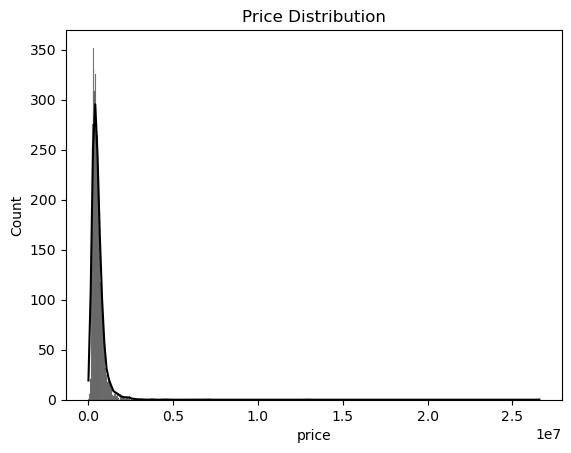

In [131]:
                              
sns.histplot(df['price'],kde=True,color='black')
plt.title('Price Distribution')
plt.show()


##### Highly Skewed Distribution:

Most houses are priced on the lower end left side

Very few houses are priced at very high levels right tail

This is called right-skewed or positively skewed data

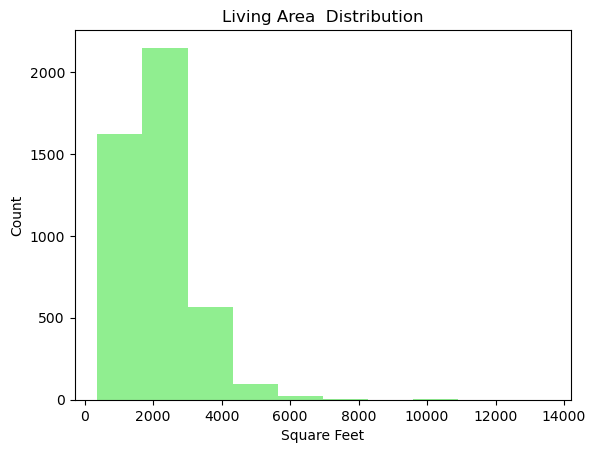

In [132]:
plt.hist(df['sqft_living'], color='lightgreen')
plt.title('Living Area  Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Count')
plt.show()

##### Most Common Living Area Range:
Majority of homes have a living area between 500 and 3000 square feet
This is the most popular size for homes
##### Right-Skewed Distribution:
There are few houses with very large living spaces above 4000+ sqft
These are less common and could be luxury or custom homes

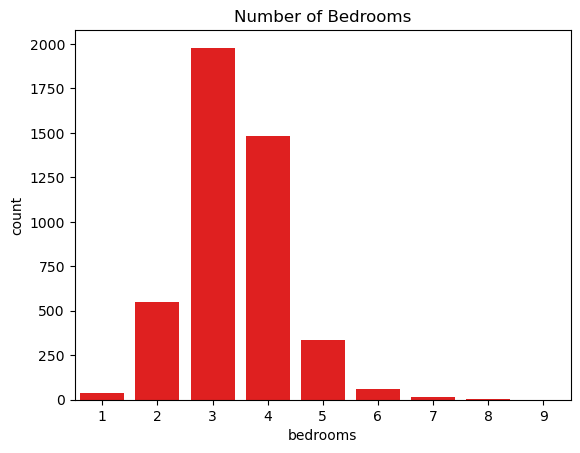

In [146]:
sns.countplot(x=df['bedrooms'],color='red')
plt.title('Number of Bedrooms')
plt.show()

##### Most Common Bedroom Counts:
The majority of homes have 3 bedrooms, followed by 4 bedrooms.
These are standard family house sizes.
##### Rare Cases:
Houses with 1 or more than 6 bedrooms are rare, possibly outliers or luxury/special-purpose homes.

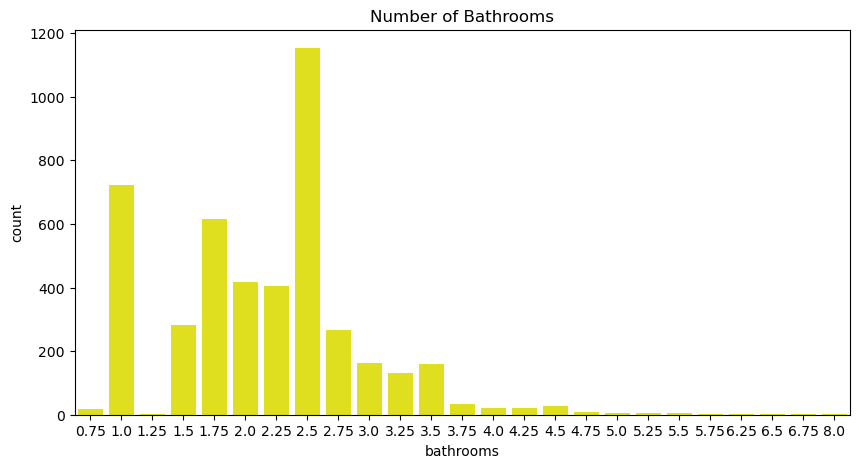

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(x='bathrooms', data=df,color='yellow')
plt.title('Number of Bathrooms')
plt.show()

##### Most Common:
Houses with 2 bathrooms are the most common, followed by those with 1 bathroom.
This aligns with typical residential layouts 
##### Less Common:
Properties with 3 or more bathrooms are less frequent. These are likely larger homes or luxury listings.
Very few homes have more than 4 bathrooms

### Bivariate Analysis: Investigate relationships between pairs of variables, such as price vs. square footage, bedrooms vs. 
### bathrooms, etc., using visualizations and statistical methods

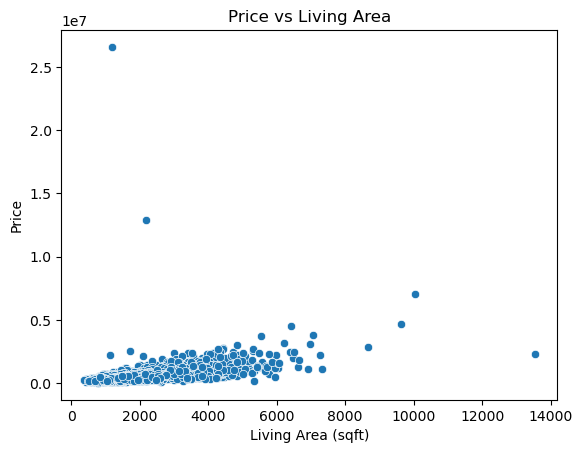

In [139]:
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

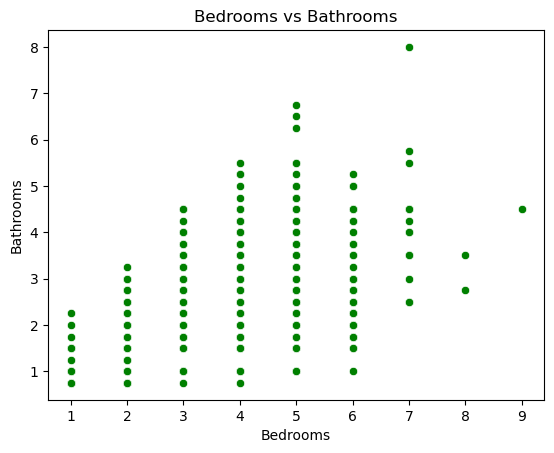

In [140]:
sns.scatterplot(x='bedrooms', y='bathrooms', data=df,color='green')
plt.title('Bedrooms vs Bathrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

#### Bedrooms vs Bathrooms
here's a positive relationship — houses with more bedrooms tend to have more bathrooms
Most data points are concentrated in the 3 to 5 bedroom and 1 to 3 bathroom range.
These are likely the most common residential layouts
A few unusual combinations like houses with 1 bedroom and 3 bathrooms, or 8 bedrooms with few bathrooms, which may indicate data anomalies or rare property types

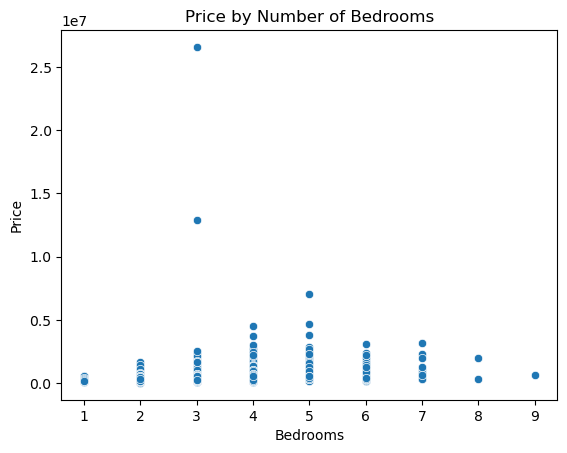

In [141]:
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


There is no clear linear relationship between the number of bedrooms and house price.
Houses with 3–5 bedrooms span a wide price range

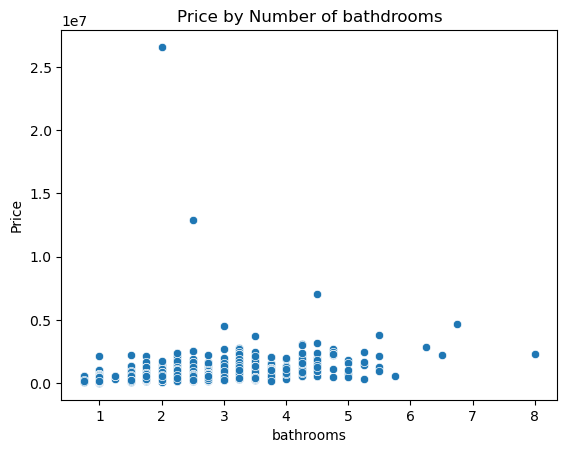

In [143]:
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Price by Number of bathdrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()


here is no clear trend indicating that more bathrooms lead to higher prices.
Prices are spread widely even for houses with 2–4 bathrooms

### Multivariate Analysis: Examine interactions and dependencies among multiple variables
### identifying correlations and patterns that may influence housing prices

In [43]:
corr = df[['price', 'sqft_living', 'bedrooms', 'bathrooms']].corr()
corr

,price,sqft_living,bedrooms,bathrooms
price,1.000000,0.444453,0.210773,0.334649
sqft_living,0.444453,1.000000,0.601190,0.711951
bedrooms,0.210773,0.601190,1.000000,0.498619
bathrooms,0.334649,0.711951,0.498619,1.000000


sqft_living is the most correlated with price (0.444), supporting what we see in the scatter plot.
bedrooms have the lowest correlation with price, suggesting quantity of rooms is not as useful as size (sqft_living) 
High correlation between sqft_living and bathrooms (0.712) may cause multicollinearity in regression models — worth watchi

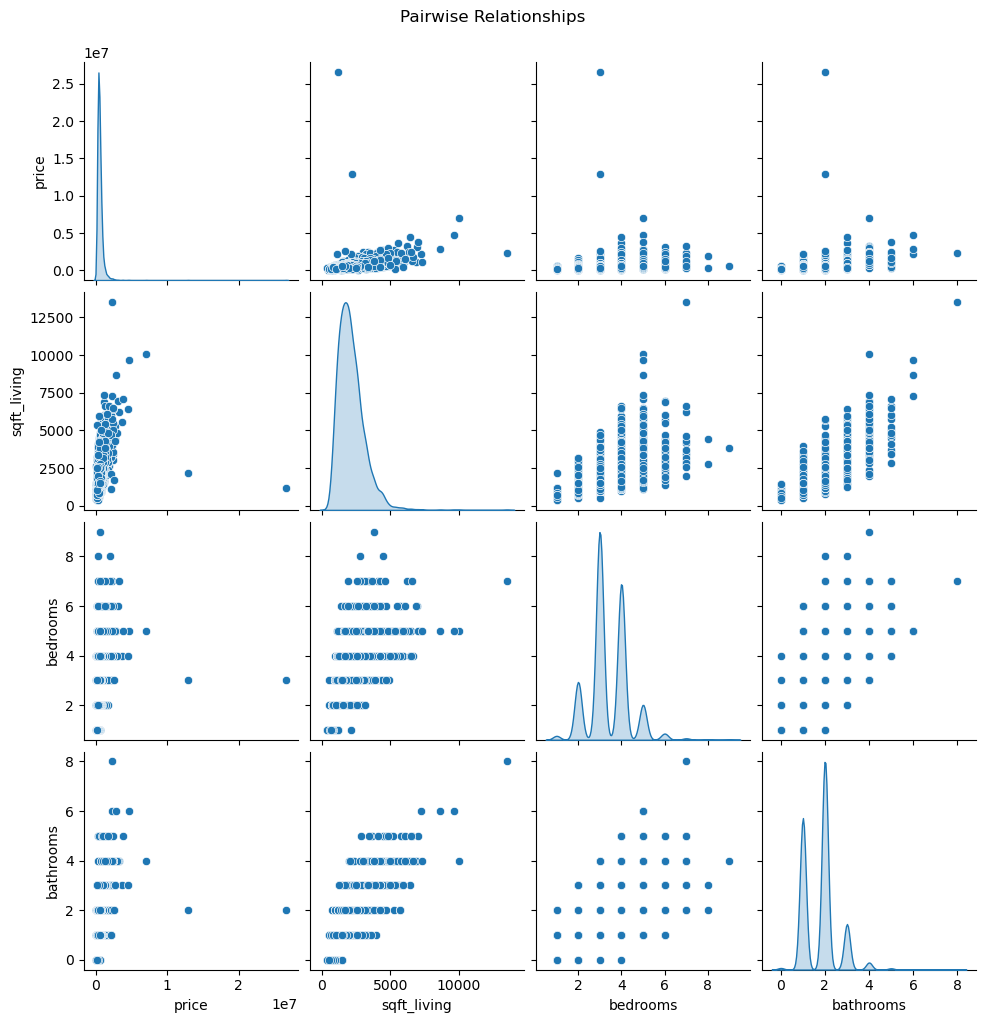

In [45]:

sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


# 	Visualization

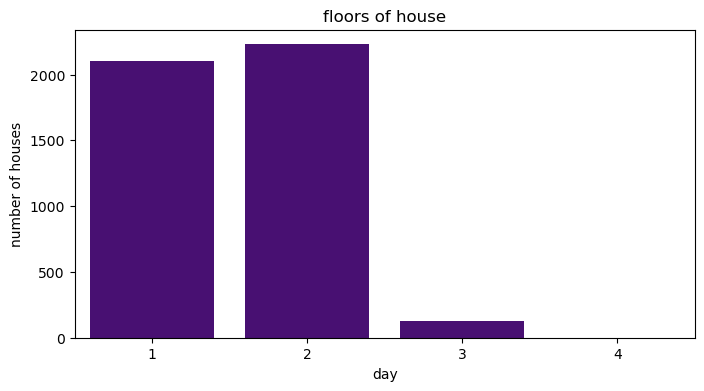

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x='floors', data=df,color='Indigo')
plt.title('floors of house')
plt.xlabel('day')
plt.ylabel('number of houses')
plt.show()

C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\3786289910.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition',data=df,palette='pastel')


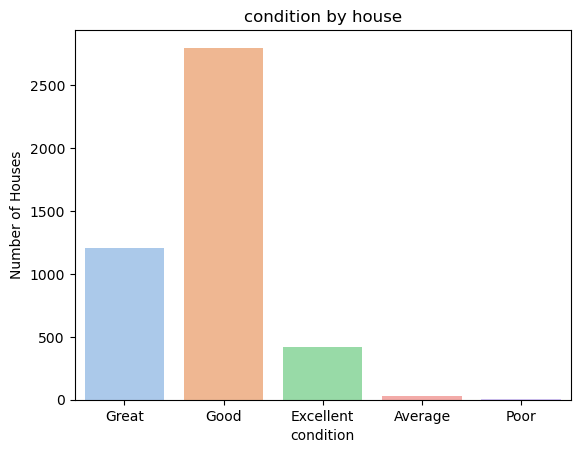

In [47]:
sns.countplot(x='condition',data=df,palette='pastel')
plt.title('condition by house')
plt.xlabel('condition')
plt.ylabel('Number of Houses')
plt.show()

In [48]:
avg_price_by_view = df.groupby('view')['price'].mean()

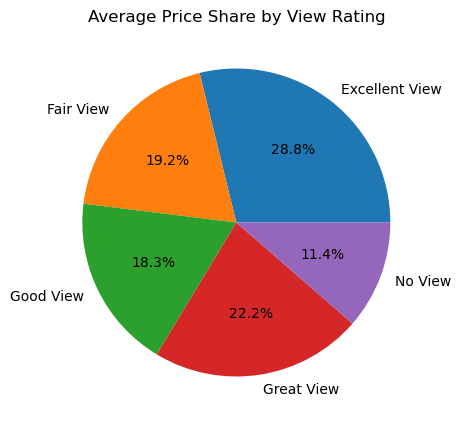

In [49]:
plt.figure(figsize=(6,5))
plt.pie(avg_price_by_view,labels=avg_price_by_view.index,autopct='%2.1f%%')
plt.title('Average Price Share by View Rating')
plt.show()

In [50]:
avg_price_by_year = df.groupby('month')['price'].mean().reset_index()


In [51]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month', 'day', 'state_name'],
      dtype='object')

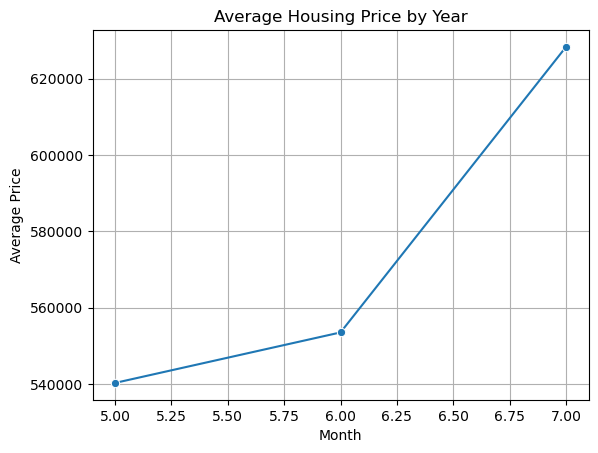

In [52]:
sns.lineplot(x='month', y='price', data=avg_price_by_year, marker='o')
plt.title('Average Housing Price by Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\1434616118.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='condition', y='price', data=avg_price_by_condition,palette='pastel')


Text(0.5, 1.0, 'Average House Price by Condition')

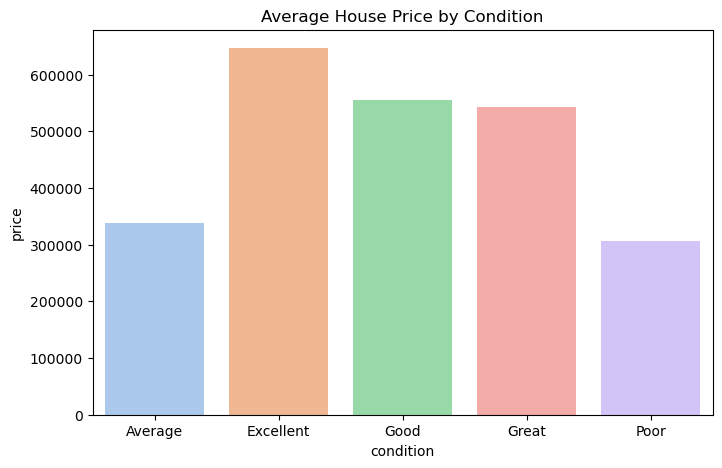

In [53]:


avg_price_by_condition = df.groupby('condition')['price'].mean().reset_index()


plt.figure(figsize=(8,5))
sns.barplot(x='condition', y='price', data=avg_price_by_condition,palette='pastel')
plt.title('Average House Price by Condition')

C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\3223630538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='view', y='price', data=avg_price_by_condition,palette='pastel')


Text(0.5, 1.0, 'Average House Price by Condition')

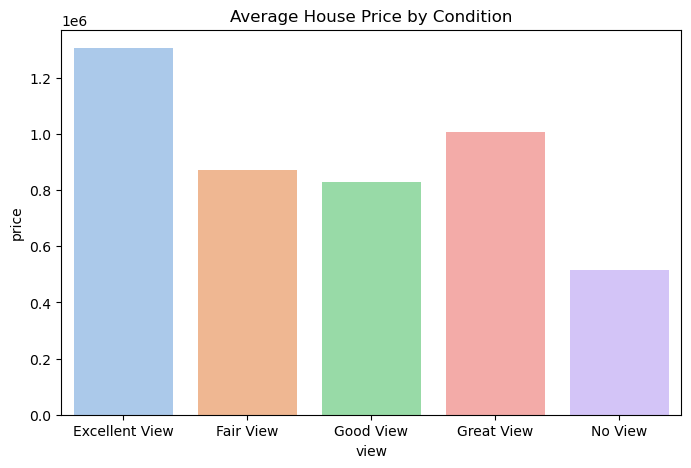

In [54]:
avg_price_by_condition = df.groupby('view')['price'].mean().reset_index()


plt.figure(figsize=(8,5))
sns.barplot(x='view', y='price', data=avg_price_by_condition,palette='pastel')
plt.title('Average House Price by Condition')

In [55]:
top_price_cities = df.groupby('city')['price'].mean().head(5)


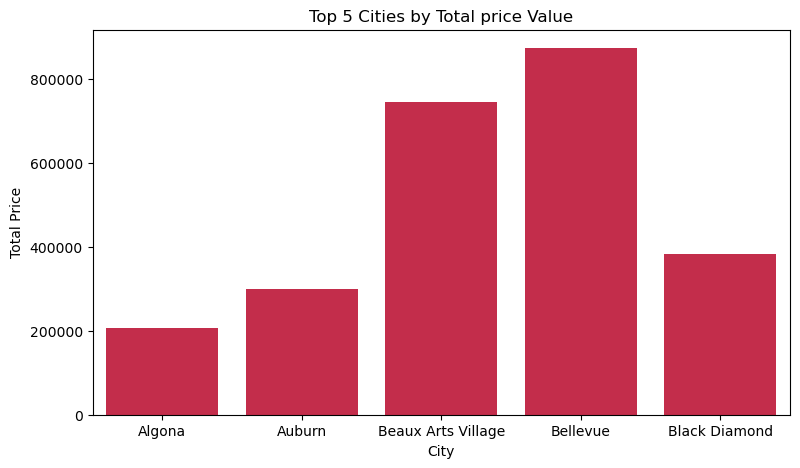

In [56]:
plt.figure(figsize=(9,5))
sns.barplot(x=top_price_cities.index, y=top_price_cities.values,color='Crimson')
plt.title('Top 5 Cities by Total price Value')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.show()

## 	Create insightful visualizations to illustrate trends, outliers, and geographical patterns in housing prices and attributes

# Trends Over Time

In [59]:
df['yr_built'].value_counts()

yr_built
2006    107
2005    102
2004     91
2007     91
1978     89
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: count, Length: 115, dtype: int64

In [60]:
avg_price = df.groupby('yr_built')['price'].mean().reset_index()


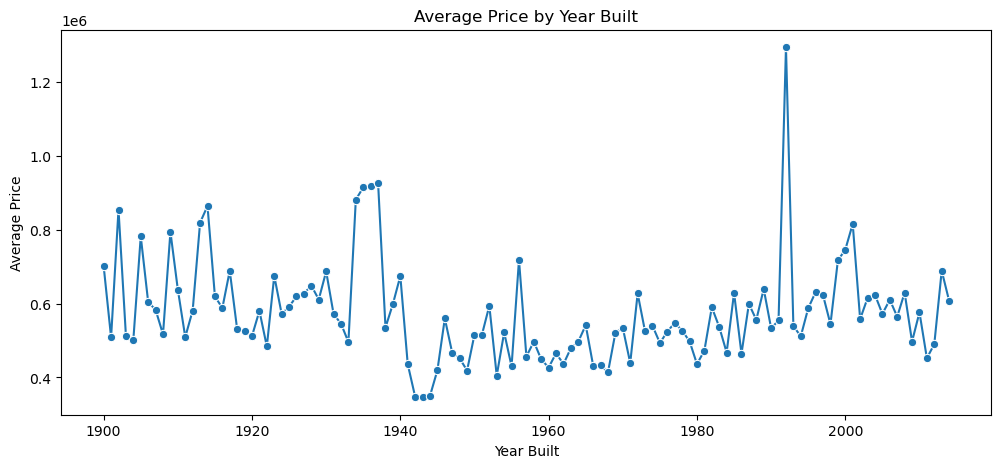

In [61]:
avg_price = df.groupby('yr_built')['price'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='yr_built', y='price', data=avg_price,marker='o')
plt.title('Average Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.show()

# Outliers

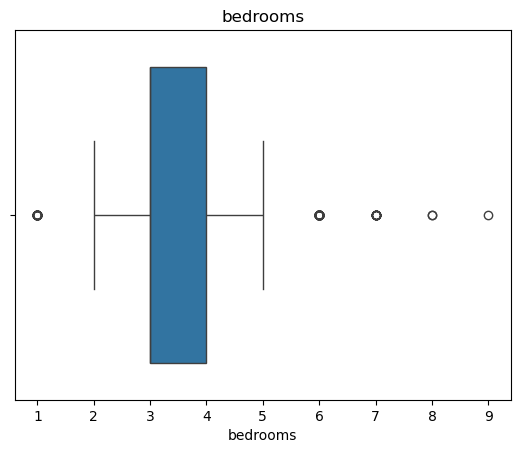

In [62]:
sns.boxplot(x=df['bedrooms'])
plt.title('bedrooms')
plt.xlabel('bedrooms')
plt.show()


In [63]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['bedrooms'] < lower_bound) | (df['bedrooms'] > upper_bound)]['bedrooms']

mean=df['bedrooms'].mean()



In [64]:
df['bedrooms'] = df['bedrooms'].replace(outliers.tolist(), mean)

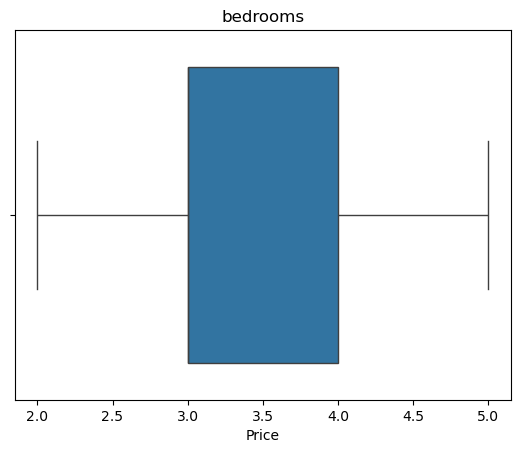

In [65]:
sns.boxplot(x=df['bedrooms'])
plt.title('bedrooms')
plt.xlabel('Price')
plt.show()

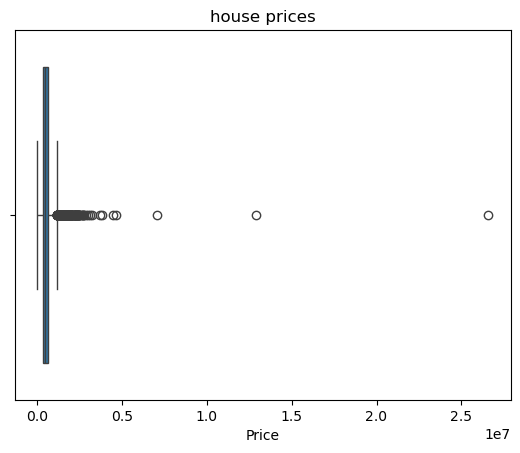

In [66]:
sns.boxplot(x=df['price'])
plt.title('house prices')
plt.xlabel('Price')
plt.show()


In [67]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]['price']

mean=df['price'].mean()


In [68]:
df['price'] = df['price'].replace(outliers.tolist(), mean)

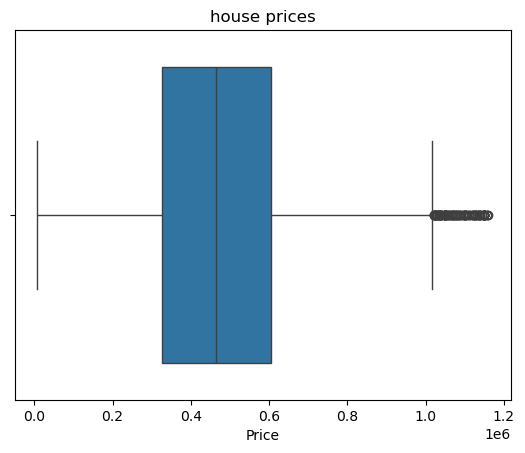

In [69]:
sns.boxplot(x=df['price'])
plt.title('house prices')
plt.xlabel('Price')
plt.show()


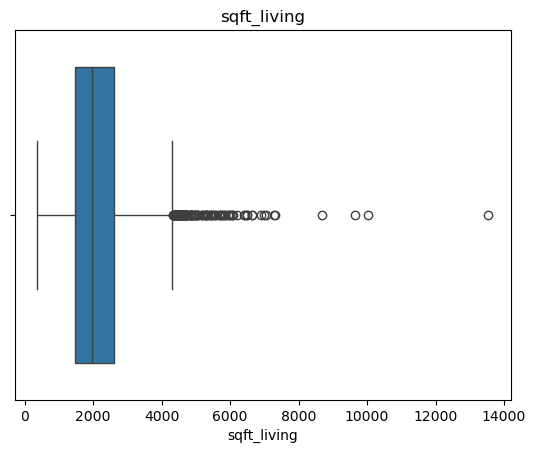

In [70]:
sns.boxplot(x=df['sqft_living'])
plt.title('sqft_living')
plt.show()


In [71]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['sqft_living'] < lower_bound) | (df['sqft_living'] > upper_bound)]['sqft_living']

mean=df['sqft_living'].mean()

In [72]:
df['sqft_living']=df['sqft_living'].replace(outliers.tolist(),mean)

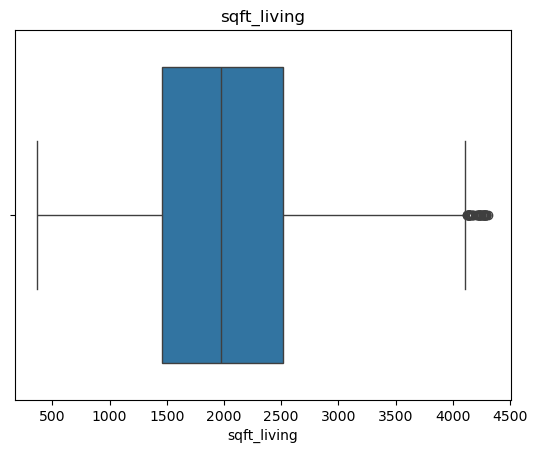

In [73]:
sns.boxplot(x=df['sqft_living'])
plt.title('sqft_living')
plt.show()

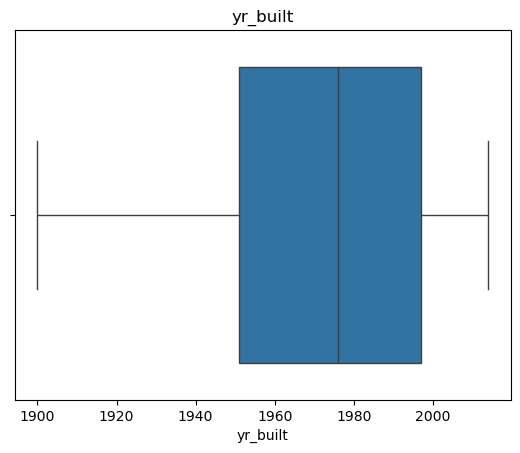

In [74]:
sns.boxplot(x=df['yr_built'])
plt.title('yr_built')
plt.show()


# geographical

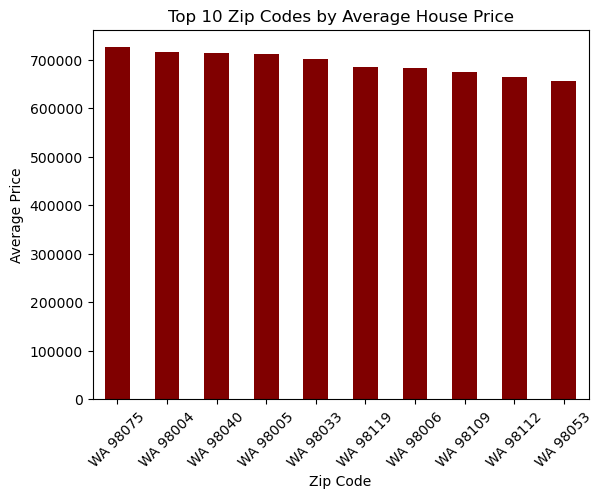

In [75]:
avg_price_zip = df.groupby('statezip')['price'].mean().sort_values(ascending=False).head(10)

avg_price_zip.plot(kind='bar', color='Maroon')
plt.title('Top 10 Zip Codes by Average House Price')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


#  Feature Engineering

In [76]:
df['House_renovated'] = df['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')

### price category

In [77]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])


### House Age

In [78]:
df['house_age'] = datetime.now().year - df['yr_built']

### price per sqft

In [79]:
df['price_per_sqft'] = df['price'] / df['sqft_living']  


In [80]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip,country,year,month,day,state_name,House_renovated,price_category,house_age,price_per_sqft
0,2014-05-03,310000.0,3.0,1,1010.0,9945.0,1,No,No View,Great,...,WA 98065,USA,2014,5,3,Washington,Not Renovated,Low,52,306.930693
1,2014-05-04,775000.0,2.0,2,2680.0,7392.0,1,No,No View,Good,...,WA 98053,USA,2014,5,4,Washington,Renovated,High,21,289.179104
2,2014-05-04,365000.0,3.0,2,2200.0,7350.0,1,No,No View,Excellent,...,WA 98058,USA,2014,5,4,Washington,Not Renovated,Low,37,165.909091
3,2014-05-04,331950.0,4.0,2,2530.0,9933.0,2,No,Good View,Good,...,WA 98092,USA,2014,5,4,Washington,Renovated,Low,35,131.205534
4,2014-05-04,783500.0,3.0,2,2850.0,7130.0,2,No,No View,Good,...,WA 98122,USA,2014,5,4,Washington,Not Renovated,High,45,274.912281


## Feature Engineering Analysis

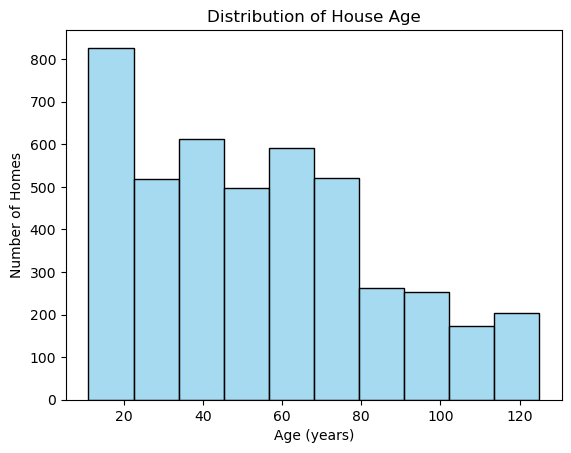

In [81]:
sns.histplot(df['house_age'], bins=10,color='skyblue')
plt.title("Distribution of House Age")
plt.xlabel("Age (years)")
plt.ylabel("Number of Homes")
plt.show()


In [147]:
avg_pps = df.groupby('city')['price_per_sqft'].mean().sort_values(ascending=False).tail(10)
sns.barplot(x=avg_pps.index, y=avg_pps.values,color='yellow')
plt.title("Top 10 Cities by Avg Price per Sqft")
plt.xticks(rotation=80)
plt.ylabel("Price per Sqft")
plt.show()


KeyError: 'Column not found: price_per_sqft'

C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\3350196163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='view', y='house_age', data=df, palette='Set2')


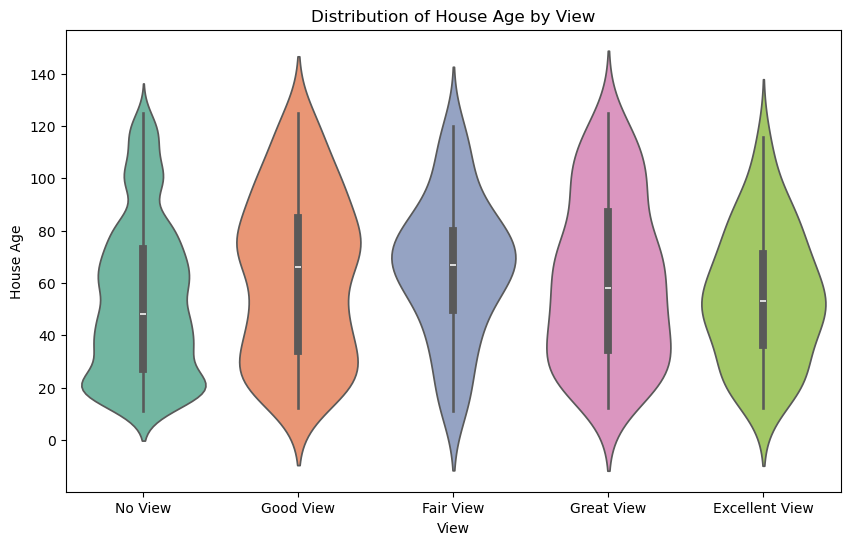

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='view', y='house_age', data=df, palette='Set2')
plt.title('Distribution of House Age by View')
plt.xlabel('View')
plt.ylabel('House Age')
plt.show()


C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\3661168591.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby('price_category')['price'].mean().reset_index()
C:\Users\jackl\AppData\Local\Temp\ipykernel_20764\3661168591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_category', y='price', data=df,palette='pastel')


Text(0.5, 1.0, 'Average House Price by Condition')

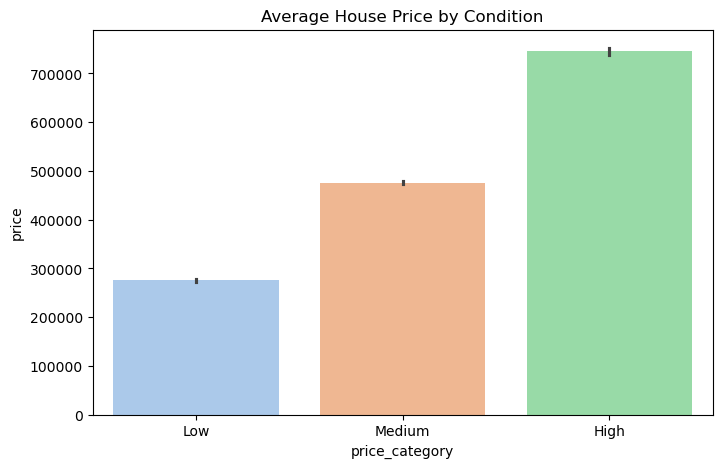

In [84]:
avg_price_by_condition = df.groupby('price_category')['price'].mean().reset_index()


plt.figure(figsize=(8,5))
sns.barplot(x='price_category', y='price', data=df,palette='pastel')
plt.title('Average House Price by Condition')

In [92]:
water_yes = df[df['waterfront'] == 'Yes']['price']
water_no = df[df['waterfront'] == 'No']['price']


In [93]:
alpha = 0.05

In [96]:
_, p_value = ttest_ind(water_yes, water_no, equal_var=False)


if p_value > alpha:
    print("Fail to reject the null huypothesis: There is  Price no difference by waterfront.")
else:
    print("Reject the null huypothesis: There is Price difference by waterfront.")

Reject the null huypothesis: There is Price difference by waterfront.


# Analysis and Interpretation

#### *Bedrooms vs Bathrooms	Most homes have 2–4 bedrooms and 1–3 bathrooms big homes usually have higher prices
#### *priced under a certain amount  500000 A few luxury homes are priced much higher
#### *Price Distribution Highly skewed —most houses are in a low to medium price with a very few excellent ones 
#### *Better condition like Good or excellent tends to   higher prices
#### *Waterfront Property	Waterfront homes are much more costly on average
#### *View Rating	Houses with better views 3–4 tend to have higher prices
#### *Year Built	New homes usually sell at higher prices than older ones
#### *Renovation	Renovated homes  are sell for more
#### *City and ZipCode Location some zip codes or cities have consistently higher prices than others
#### *Older homes may be cheaper or renovated. Newer homes may cost more
#### *Most homes may be in average or good condition
#### *Very few are in poor or excellent condition
#### *housing prices are increasing or decreasing over the years
#### *Most homes have no view 0. Better views 3-4 are rare but likely increase value
#### *sqft_living has the highest correlation with price
#### *Price increases most with square living and house 
#### *More bathrooms usually mean higher price, even with the same size
#### *Bedrooms don’t affect price as much when controlling for size
#### *Most homes are affordable, but a few luxury houses raise the average price
#### *price_per_sqft helps compare value across cities and neighborhoods
#### *Removed outliers in price, bathrooms, sqft_living to improve analysis 
#### *Cleaned columns like view, condition, and waterfront to be more interpretable Yes/No, Good/Average
#### *Converted date column to proper datetime  like year



# Recommendations

###  For Sellers:
#### Improve condition: Simple renovations (e.g., paint, flooring, kitchen updates) can significantly increase price.
#### Highlight location advantages: Mention nearby parks, schools, or waterfronts.
#### Stage the view: Homes with views should be emphasized in listings.

### For Buyers/Investors:
#### Look for undervalued areas: Use price-per-sqft analysis to find areas with potential.
#### Consider renovation projects: Older homes with low price but good structure may yield high ROI.
#### Avoid overpaying for size: After a point, increasing sqft doesn’t add as much to price.

### For Developers:
#### Focus on high-demand zip codes.
#### Waterfront or scenic view areas offer premium opportunities.
#### Smaller high-quality homes might give better returns than larger low-grade constructions.

# CONCLUSTION

### analysis demonstrated how to clean, visualize, and extract meaningful insights from housing data using Python. 
### It included univariate, bivariate, and multivariate analysis, along with feature engineering and insightful visualizations. 
### These findings can assist in data-driven decision-making for real estate pricing, investment, or development planning.
